# PTC Readthrough 48h
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [5]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.0
   pandas: 0.23.3
   seaborn: 0.9.0


# Generating the data

In [6]:
# Define the protocol

channel_map = {"DAPI - DAPI": "NucliChannel",
               "Cy3 - Cy3": ["SemiCytoChannel", "ActinChannel"],
               "Cy5 - Cy5": "MitoTrackerChannel",
               "FITC - FITC": "GferChannel",
               "DataExtractors": [{"class": "NucliDataExtractor", "data_sources": ["Nucli"],
                       "trigger_after": "Nucli"},
                      {"class": "NucliCytoDataExtractor", "data_sources": ["Nucli", "Cyto"],
                       "trigger_after": "Nucli"},
                      {"class": "SemiCytoImageUnification", "data_sources": ["Cyto", "Nucli", "GFER", "MitoTracker"],
                       "trigger_after": "Nucli"},
                      {"class": "CytoDataExtractor", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"},
                      {"class": "MitoTrackerDataExtractor", "data_sources": ["MitoTracker"],
                       "trigger_after": "MitoTracker"},                                 
                      {"class": "AntiBodyDataExtractor", "data_sources": ["GFER"],
                       "trigger_after": "GFER"},
                      {"class": "AntiBodyDataExtractor", "data_sources": ["Actin"],
                       "trigger_after": "Actin"},
                      {"class": "ContoursExporter", "data_sources": ["Cyto"],
                       "trigger_after": "Cyto"}]
               }

In [7]:
# Running folder loader
import os, sys
segmenter_path = "C:\\Code\\CellDoctor"
sys.path.append(segmenter_path) 

from Segmenter.FolderLoader import FolderLoader 


images_path = "E:\\BioData\\Experiments\\Images\\lyco and comp\\Standard lab acquisition protocol GFER IF\\Standard lab acquisition protocol GFER IF_comp48h_mitogferandcox280119_1"
# FolderLoader(images_path, protocol_channel_map=channel_map, parallel_processing=False, continue_existing_session=True)


In [8]:
from Segmenter.DataProcessor.ImageDataUnifier import ImageDataUnifier

results_path = images_path+'\\results'


unification_protocol = [("base", {"ch_type": "Nucli"}),
                         ("join", {"ch_type": "Cyto", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "GFER", "full_tbl_fld": "cyto_label"}),
                         ("join", {"ch_type": "Actin", "full_tbl_fld": "cyto_label"}),
                         ("join_agg", {"ch_type": "MitoTracker", "full_tbl_fld": "cyto_label"}),
                        ]

# ImageDataUnifier(folder_path=results_path,unification_protocol=unification_protocol)

# General

In [9]:
patients = {"AV": {'age': 6*4, "gender": "M", "color": "cornflowerblue"}, 
            "EV": {"age": 5.5*12*4, "gender": "F", "color": "violet"},
            "HC CM": {"age": 6*12*4, "gender": "F", "color": "green"},
            "AG044": {"age": 15, "gender": "F", "color": "limegreen"},
            "AG015": {"age": 3/7, "gender": "M", "color": "cyan"},
            "HV": {"age": 37*12*4, "gender": "F", "color": "darkviolet"},
            "MV": {"age": 36.5*12*4, "gender": "M", "color": "royalblue"},
            "HC IK": {"age": 32*12*4, "gender": "F", "color": "gray"},
            "HC OZ": {"age": 35*12*4, "gender": "M", "color": "yellow"},
            "HC NA0730":{"age": 53*12*4, "gender": "M", "color": "coral"},
            "HD":{"age": np.nan, "gender": np.nan, "color": "orange"}}
patients_df = pd.DataFrame(patients).T
patients_df

age           color gender
AV               24  cornflowerblue      M
EV              264          violet      F
HC CM           288           green      F
AG044            15       limegreen      F
AG015      0.428571            cyan      M
...             ...             ...    ...
MV             1752       royalblue      M
HC IK          1536            gray      F
HC OZ          1680          yellow      M
HC NA0730      2544           coral      M
HD              NaN          orange    NaN

[11 rows x 3 columns]

# Loading the data

## General

In [10]:
data_path = "../Data/RT/48h/agg_results.csv"
df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)

In [11]:
df.sample(7)

Actin_avg  Actin_max  Actin_q10  Actin_q50  Actin_q90  Actin_size  Actin_std  Cyto_area  Cyto_aspect_ratio   Cyto_avg  Cyto_circularity_size_ratio  Cyto_cx  Cyto_cy  Cyto_extent  Cyto_h  Cyto_max  Cyto_min_enclosing_circle_area  Cyto_perimeter  Cyto_q10  Cyto_q50  Cyto_q90  Cyto_rect_area  Cyto_size  Cyto_solidity   Cyto_std  Cyto_w   GFER_avg  GFER_max  GFER_q10  GFER_q50  GFER_q90  GFER_size   GFER_std  MitoTracker_area_mean  MitoTracker_area_median  MitoTracker_area_q10  MitoTracker_area_q90  MitoTracker_area_std  MitoTracker_area_sum  MitoTracker_aspect_ratio_mean  MitoTracker_aspect_ratio_median  MitoTracker_aspect_ratio_q10  MitoTracker_aspect_ratio_q90  MitoTracker_aspect_ratio_std  MitoTracker_aspect_ratio_sum  MitoTracker_avg_mean  MitoTracker_avg_median  MitoTracker_avg_q10  MitoTracker_avg_q90  MitoTracker_avg_std  MitoTracker_avg_sum  MitoTracker_circularity_size_ratio_mean  MitoTracker_circularity_size_ratio_median  MitoTracker_circularity_size_ratio_q10  \
17888  12.216211       61.0        3.0       10.0       24.0     16877.0   8.565029    30658.0           0.554839  17.184575                     0.178454    998.0   1713.0     0.255547   465.0     110.0                   177574.937311     1856.052944       3.0      15.0      34.0        119970.0    31689.0       0.425250  12.950047   258.0  10.648945      79.0       7.0       7.0      15.0     2370.0   5.846847             791.208333                    59.50                  11.1                546.20           2349.293525                9494.5                       1.073569                         0.798077                      0.470000                      1.916667                      0.829437                     12.882826              6.432181                5.955240             2.304511             8.297832             4.840753            77.186172                                 0.420859                                   0.406724                                0.098348   
27090  31.448711      199.0        4.0       25.0       72.0     58122.0  27.412590   127450.5           0.686765  18.724040                     0.328614    926.0    471.0     0.401343   680.0     108.0                   391401.681375     3416.064259       2.0       3.0      64.0        317560.0   128620.0       0.669165  25.676121   467.0  25.721193     109.0      18.0      18.0      54.0    15595.0  15.619107            2802.571429                    71.75                   2.8               2121.60           8841.577237               39236.0                       0.897883                         0.904545                      0.310305                      1.380000                      0.483475                     12.570355              6.386231                4.130552             2.130357            11.392820             5.002524            89.407232                                 0.443401                                   0.446546                                0.114890   
31528  21.939237      136.0       10.0       22.0       32.0      8887.0  10.267532    15392.5           0.875000  71.052769                     0.601651   1386.0   1102.0     0.567905   176.0     249.0                    26111.495168      716.256920       5.0      41.0     177.0         27104.0    15710.0       0.833807  72.573088   154.0  31.205012     200.0       4.0      27.0      68.0    11453.0  26.747593            2922.500000                   248.00                  62.0               6852.80           4835.118484                8767.5                       1.368521                         1.411765                      1.237392                      1.482353                      0.157615                      4.105563             40.376994               39.352201            10.208902            70.955003            37.976685           121.130981                                 0.344772                                   0.384702                                0.189214   
13883  14.419368      151.0        4.0 

## Transforming the experiment specifics


<img src="../Data/RT/24h/IMG_20190212_152730.jpg"  style="width: 800px; height: 400px"/>

In [12]:
# Replacing the name GFER with AntiBody as the plate contain also Cox17
df.columns = df.columns.str.replace("GFER", "AntiBody")

In [13]:
# Adding patients name
col_map = {2:"AV", 3:"AV", 4:"AV", 5:"AV", 6:"EV", 7:"EV", 8:"EV", 9:"EV", 10:"HD", 11:"AG015"}
df["patient"] = df.column.map(col_map)

In [14]:
# Adding Antibodies names
df["AntiBodyType"] = np.nan
df.loc[df.column.isin([2,4,6,8]), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([3,5,7,9]), "AntiBodyType"] = "Cox17"
df.loc[df.column.isin([10,11]) & df.row.isin(['B', 'D', 'F']), "AntiBodyType"] = "GFER"
df.loc[df.column.isin([10,11]) & df.row.isin(['C', 'E', 'G']), "AntiBodyType"] = "Cox17"
df["AntiBodyType"].isna().any()

False

In [15]:
antibody_plate = df.groupby(['column', 'row']).AntiBodyType.first().unstack(level=-1).T
antibody_plate 

column    2      3     4      5     6      7     8      9      10     11
row                                                                     
B       GFER  Cox17  GFER  Cox17  GFER  Cox17  GFER  Cox17   GFER   GFER
C       GFER  Cox17  GFER  Cox17  GFER  Cox17  GFER  Cox17  Cox17  Cox17
D       GFER  Cox17  GFER  Cox17  GFER  Cox17  GFER  Cox17   GFER   GFER
E       GFER  Cox17  GFER  Cox17  GFER  Cox17  GFER  Cox17  Cox17  Cox17
F       GFER  Cox17   NaN  Cox17  GFER  Cox17  GFER  Cox17   GFER   GFER
G       GFER  Cox17  GFER  Cox17  GFER  Cox17  GFER  Cox17  Cox17  Cox17

In [16]:
# Adding Compunds and concentration 
df["Compound"] = np.nan
df.loc[(df.row=='B') & (df.column.isin([2,3,6,7])), "Compound"] = "Control"
df.loc[(df.row=='B') & (df.column.isin([4,5,8,9])), "Compound"] = "DMSO"

df.loc[(df.row=='C') & (df.column.isin([2,3,6,7])), "Compound"] = "PTC124_10"
df.loc[(df.row=='C') & (df.column.isin([4,5,8,9])), "Compound"] = "PTC124_20"

df.loc[(df.row=='D') & (df.column.isin([2,3,6,7])), "Compound"] = "G418_2"
df.loc[(df.row=='D') & (df.column.isin([4,5,8,9])), "Compound"] = "G418_5"

df.loc[(df.row=='E') & (df.column.isin([2,3,6,7])), "Compound"] = "G418_8"
df.loc[(df.row=='E') & (df.column.isin([4,5,8,9])), "Compound"] = "Azithromycin_100"

df.loc[(df.row=='F') & (df.column.isin([2,3,6,7])), "Compound"] = "Azithromycin_350"
df.loc[(df.row=='F') & (df.column.isin([4,5,8,9])), "Compound"] = "Azithromycin_700"

df.loc[(df.row=='G') & (df.column.isin([2,3,6,7])), "Compound"] = "Amlexanox_25"
df.loc[(df.row=='G') & (df.column.isin([4,5,8,9])), "Compound"] = "Amlexanox_50"

df.loc[(df.row.isin(['B','C'])) & (df.column.isin([10,11])), "Compound"] = "Control"
df.loc[(df.row.isin(['D', 'E'])) & (df.column.isin([10,11])), "Compound"] = "PTC124_20"
df.loc[(df.row.isin(['F', 'G'])) & (df.column.isin([10,11])), "Compound"] = "Amlexanox_50"
df["Compound"].isna().any()

False

In [17]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column                2                 3                 4                 5                 6                 7                 8                 9             10            11
row                                                                                                                                                                               
B                Control           Control              DMSO              DMSO           Control           Control              DMSO              DMSO       Control       Control
C              PTC124_10         PTC124_10         PTC124_20         PTC124_20         PTC124_10         PTC124_10         PTC124_20         PTC124_20       Control       Control
D                 G418_2            G418_2            G418_5            G418_5            G418_2            G418_2            G418_5            G418_5     PTC124_20     PTC124_20
E                 G418_8            G418_8  Azithromycin_100  Azithromycin_100            G418_8            G418_8  Azithromycin_100  Azithromycin_100     PTC124_20     PTC124_20
F       Azithromycin_350  Azithromycin_350               NaN  Azithromycin_700  Azithromycin_350  Azithromycin_350  Azithromycin_700  Azithromycin_700  Amlexanox_50  Amlexanox_50
G           Amlexanox_25      Amlexanox_25      Amlexanox_50      Amlexanox_50      Amlexanox_25      Amlexanox_25      Amlexanox_50      Amlexanox_50  Amlexanox_50  Amlexanox_50

In [18]:
# (F, 9) have no cells 
df.groupby(['column', 'row'])['Actin_avg'].count()[9]

row
B    245
C    339
D    161
E    148
F      1
G    261
Name: Actin_avg, dtype: int64

# Number of cells 

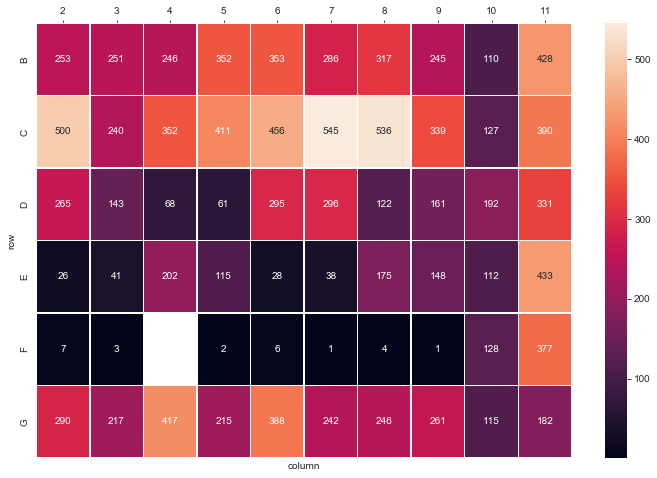

In [19]:
cell_in_well = df.groupby(["row", "column"])["AntiBodyType"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [20]:
order = ['Control', 'DMSO', 
         'PTC124_10', 'PTC124_20', 
         'Amlexanox_25', 'Amlexanox_50',
         'G418_2', 'G418_5', 'G418_8', 
         'Azithromycin_100', 'Azithromycin_350', 'Azithromycin_700'
        ]



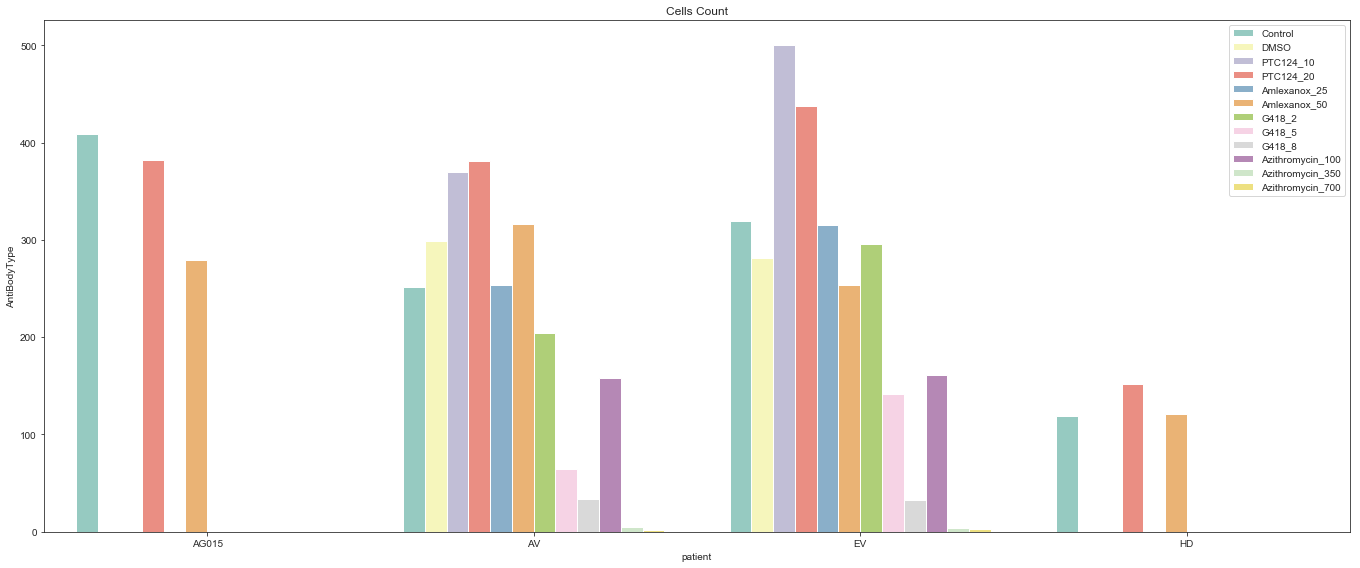

In [21]:
g = df.groupby(["row", "column", "patient", "Compound"])["AntiBodyType"].count()
g = g.groupby(["patient", "Compound"]).mean().reset_index()

compounds_use = g[g>50].reset_index().Compound.unique().tolist()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="AntiBodyType", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


In [22]:
# TODO: Consider adding a tag of positive effect (greater then 15% increase from DMSO), negative (... -15% ...) and natural (-15%..+15%)

# Analyzing the features

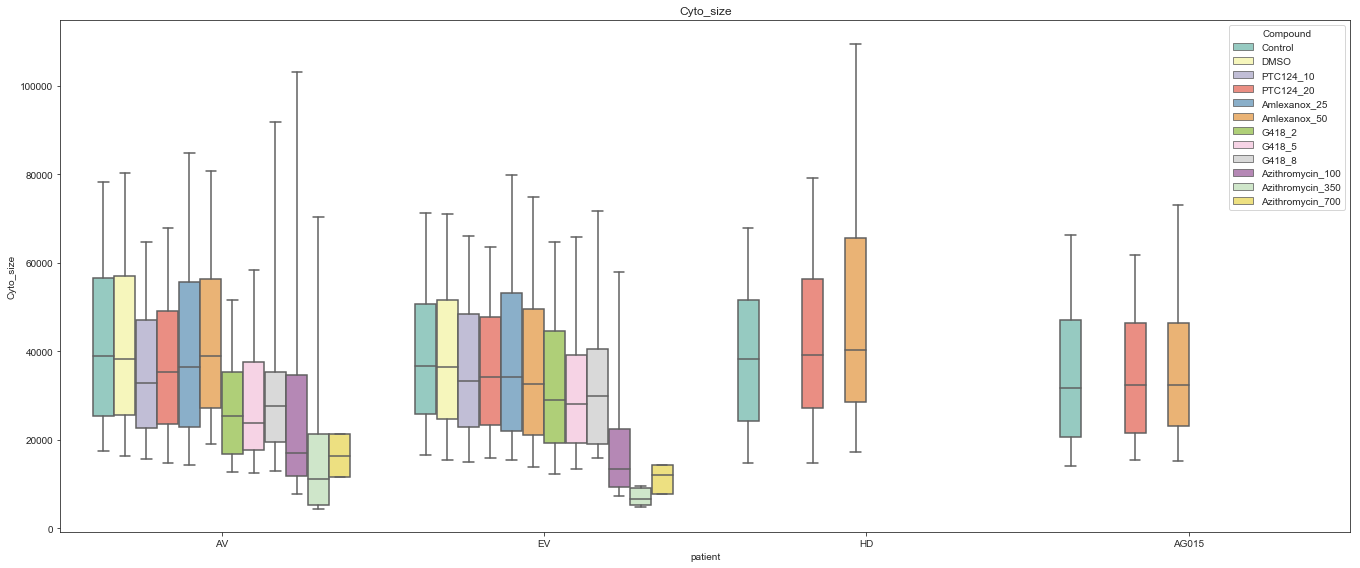

In [23]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="patient", y="Cyto_size", hue="Compound", data=df[df.Compound.isin(compounds_use)], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

As there are cases when the size and count have negative correlation let's integrate it 

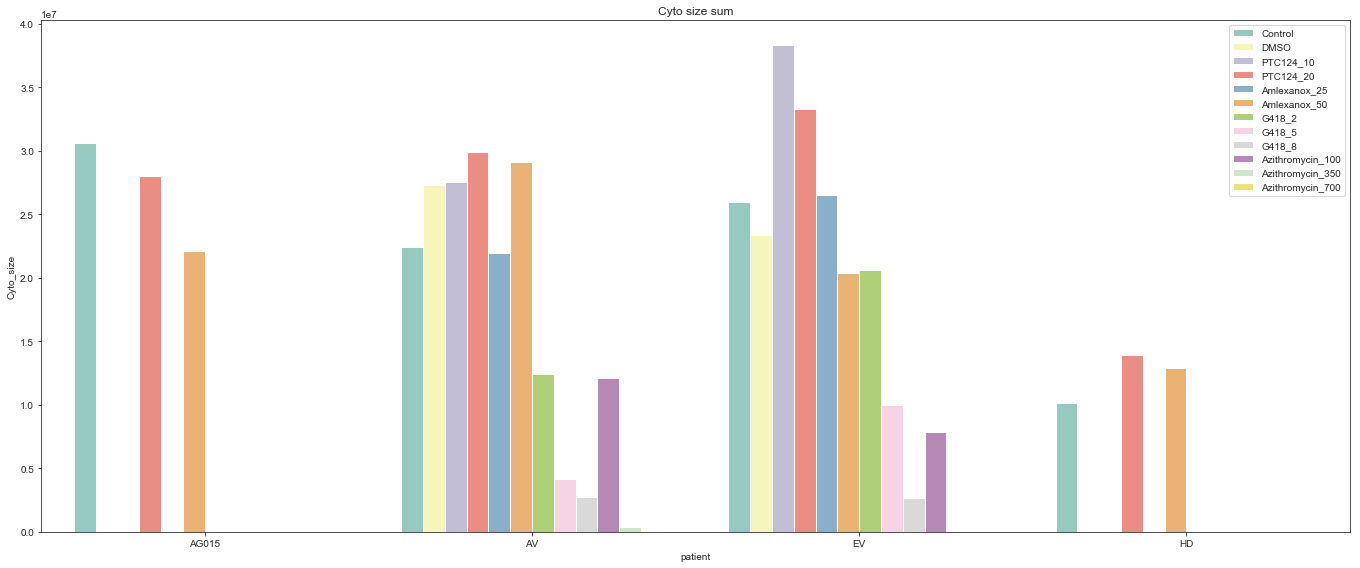

In [24]:
g = df.groupby(['patient', 'Compound'])["Cyto_size"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="patient", y="Cyto_size", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto size sum")
ax.legend(loc = 1)
plt.tight_layout()

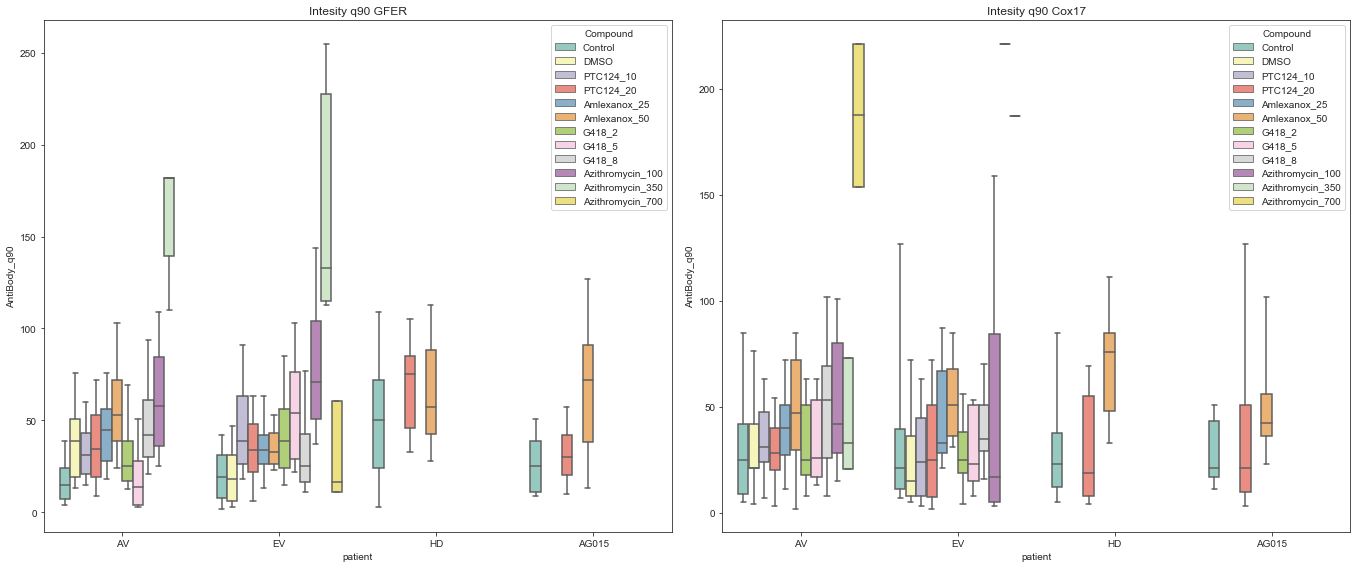

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_q90", hue="Compound",  data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title("Intesity q90 "+abType)
plt.tight_layout()

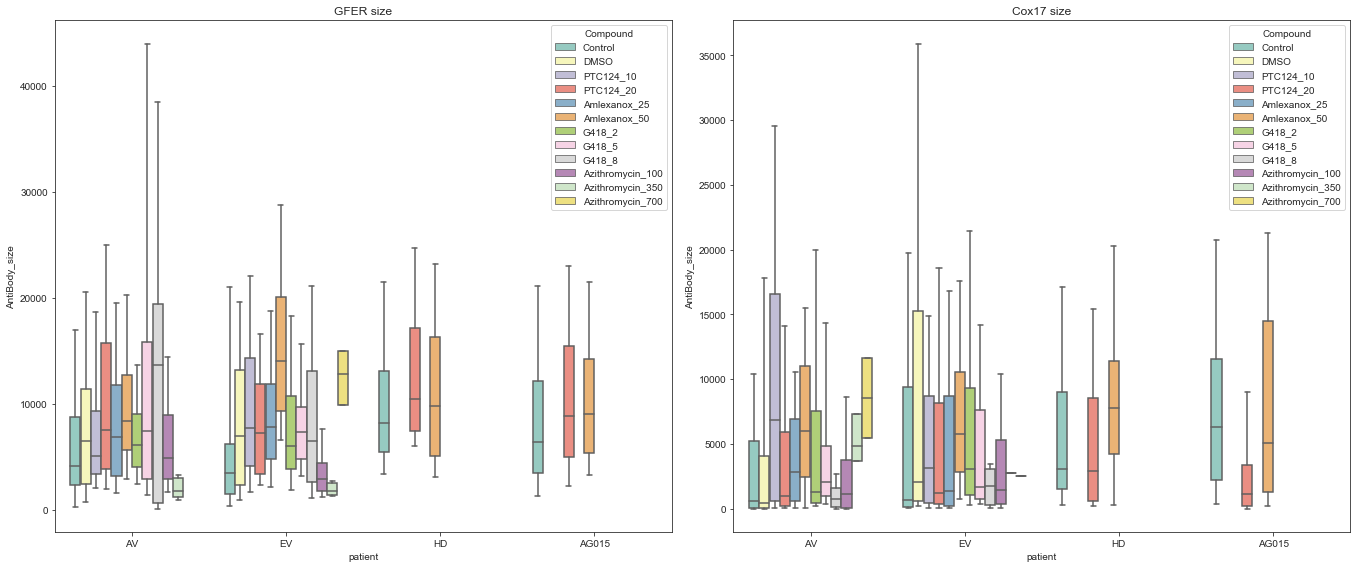

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(f"{abType} size")
plt.tight_layout()

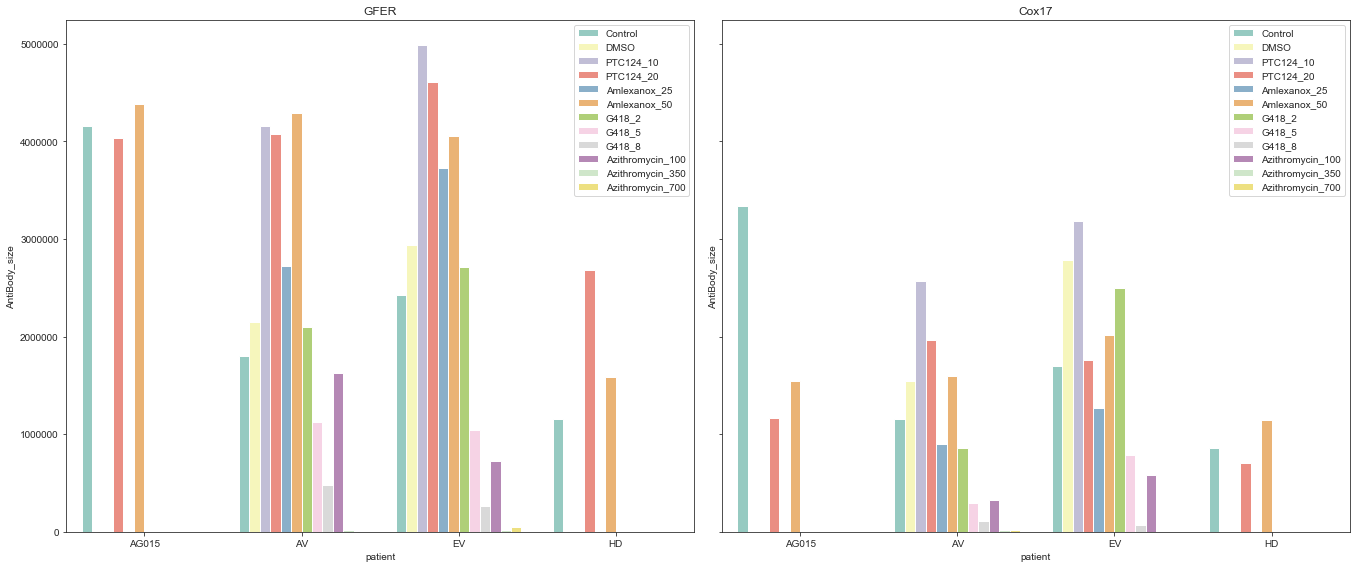

In [27]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["AntiBody_size"].sum()


sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="AntiBody_size", hue="Compound", data=g[g.AntiBodyType==abType], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title(abType)
    ax[i].legend(loc = 1)
plt.tight_layout()

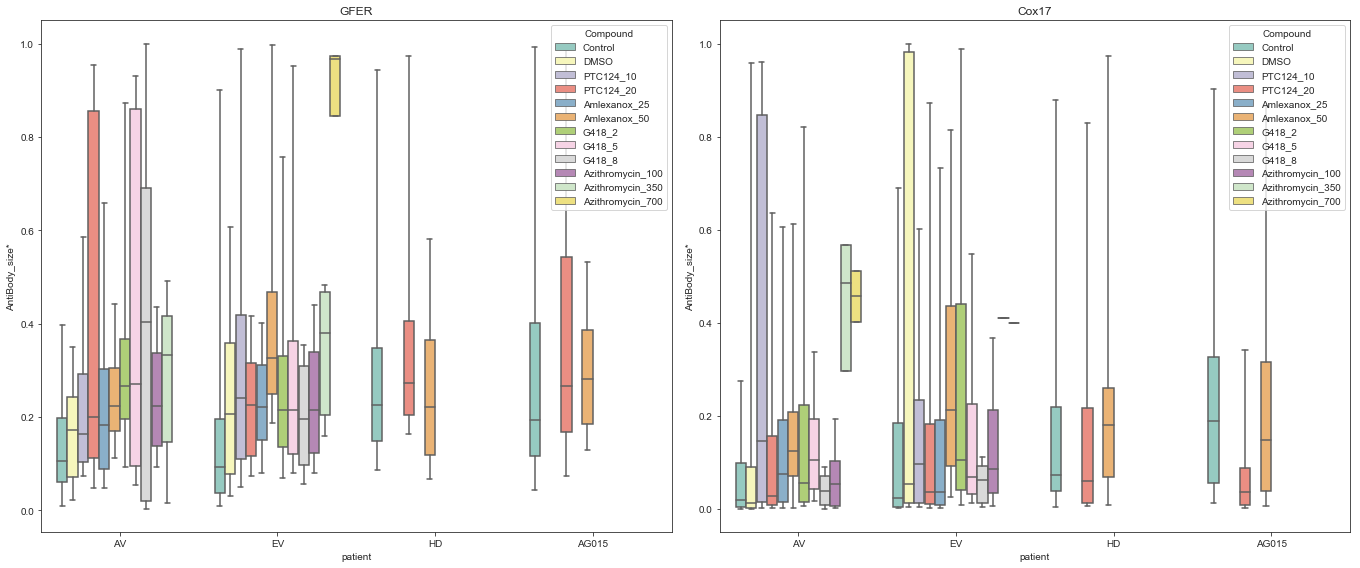

In [28]:
df['AntiBody_size*'] = df['AntiBody_size']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size*", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

Can it be that Alon and Ella require different treatment?
What can cause it?
* Different mix of protein allele
* Different cleaning characteristics

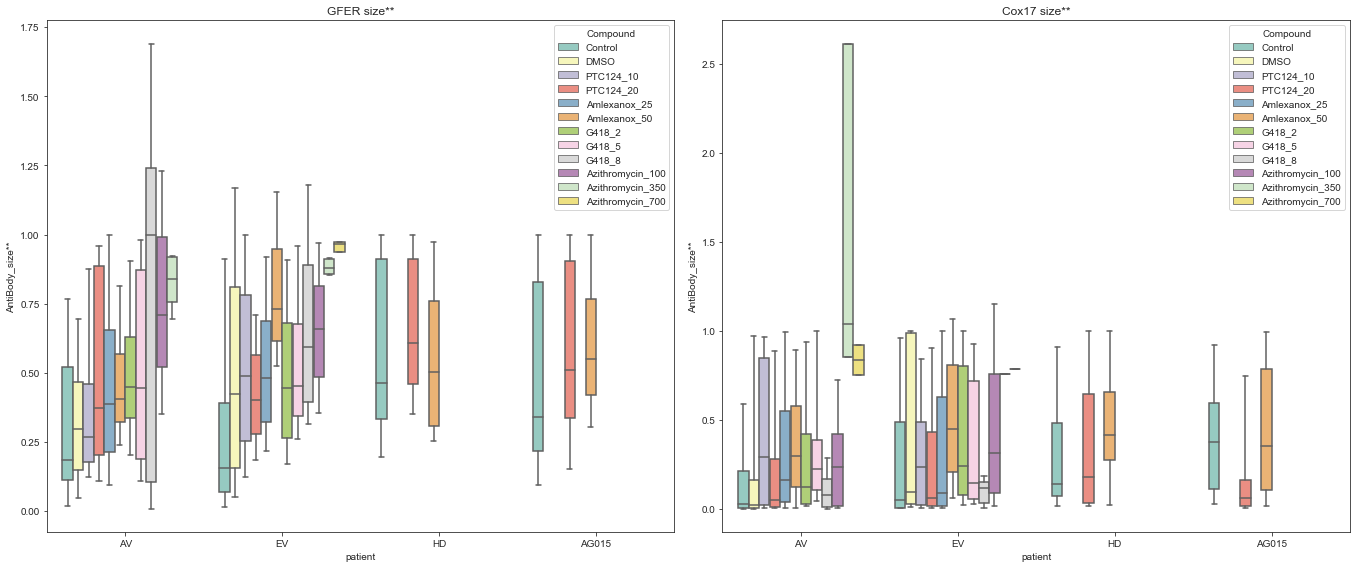

In [29]:
df['AntiBody_size**'] = df['AntiBody_size']/df['MitoTracker_size_sum']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_size**", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType+" size**")
plt.tight_layout()

In [30]:
# These results does not make sense
# TODO: Look at Cox17 and PTC124_20, DMSO in Ella
# TO Consider re-run with co-localization

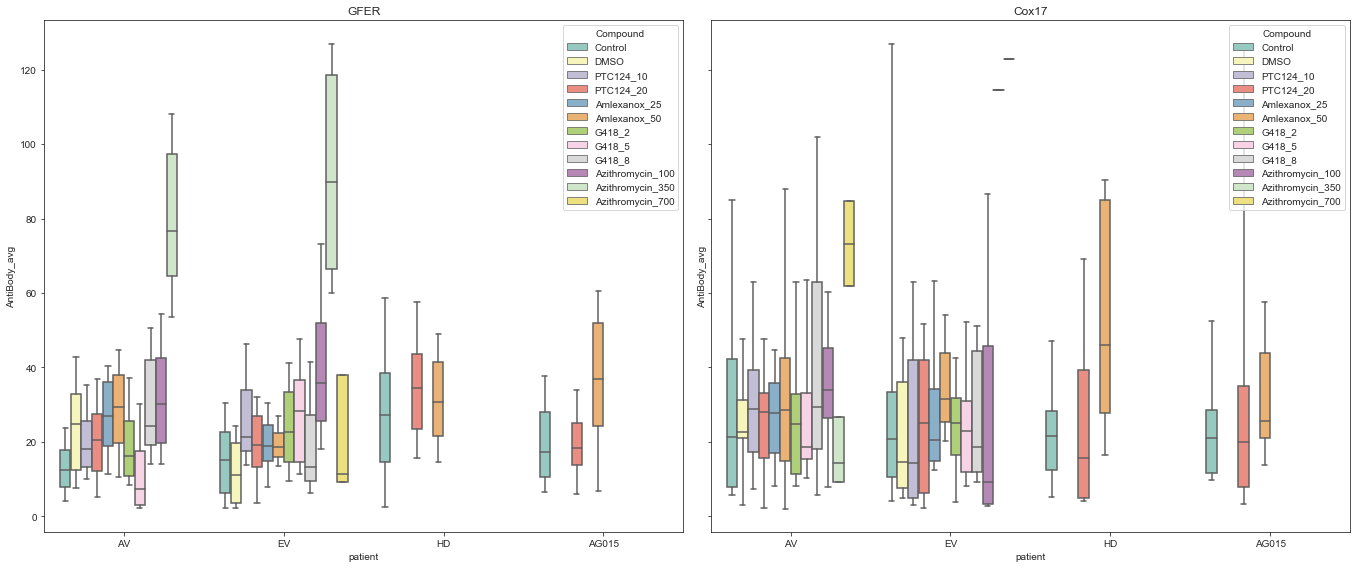

In [31]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_avg", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

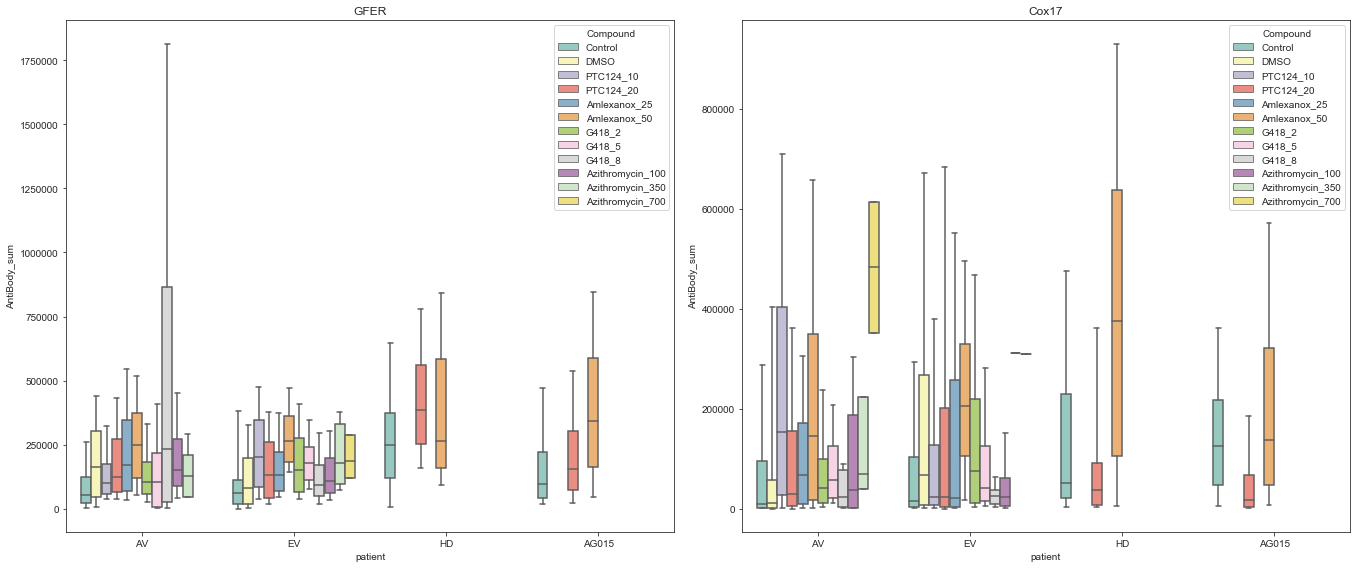

In [32]:
# AntiBody IxA
df['AntiBody_sum'] = df['AntiBody_avg']*df['AntiBody_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=False)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.boxplot(x="patient", y="AntiBody_sum", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax[i], hue_order=order)
    ax[i].set_title(abType)
plt.tight_layout()

In [33]:
# TODO: to divid by DMSO

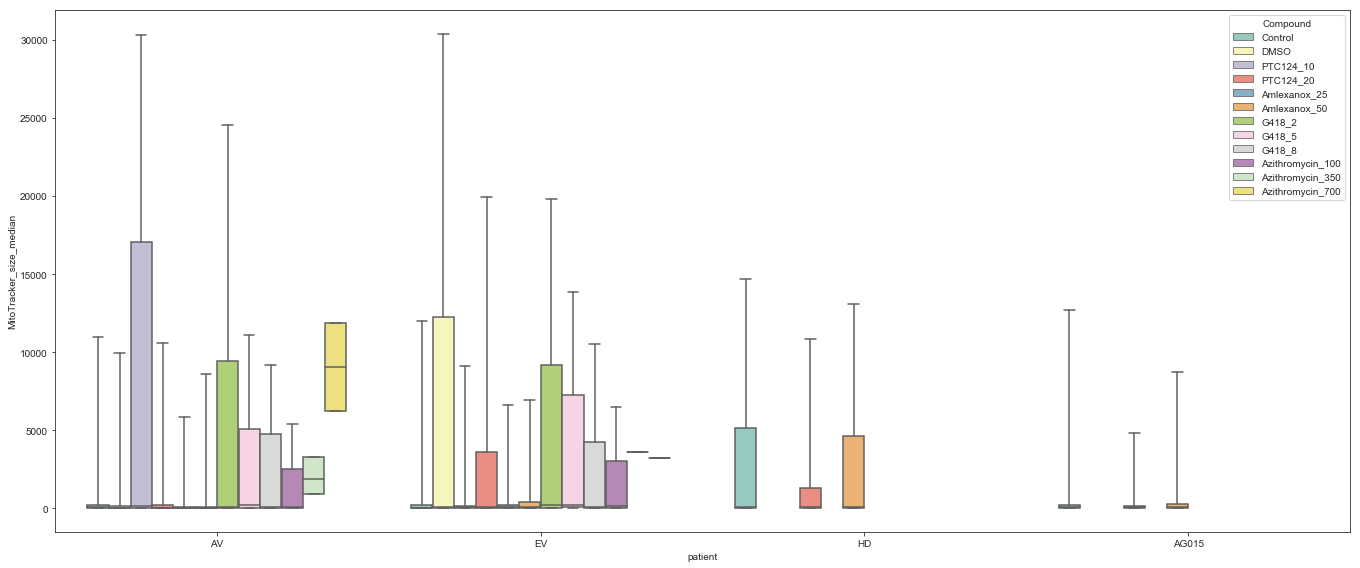

In [34]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_median", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

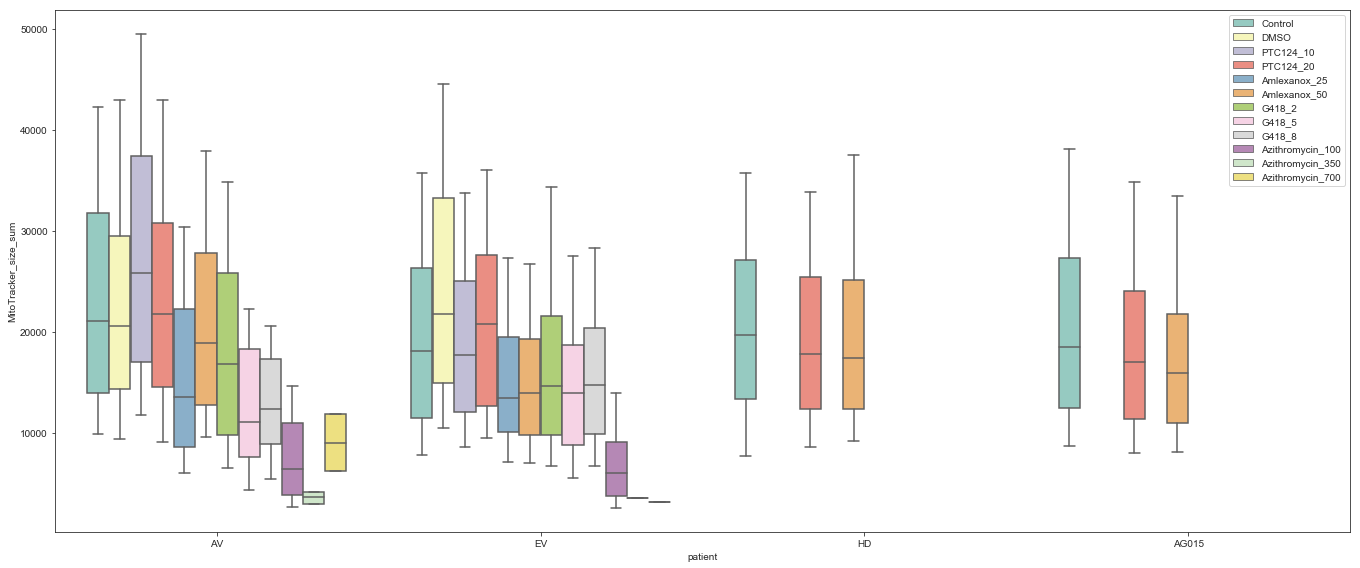

In [35]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

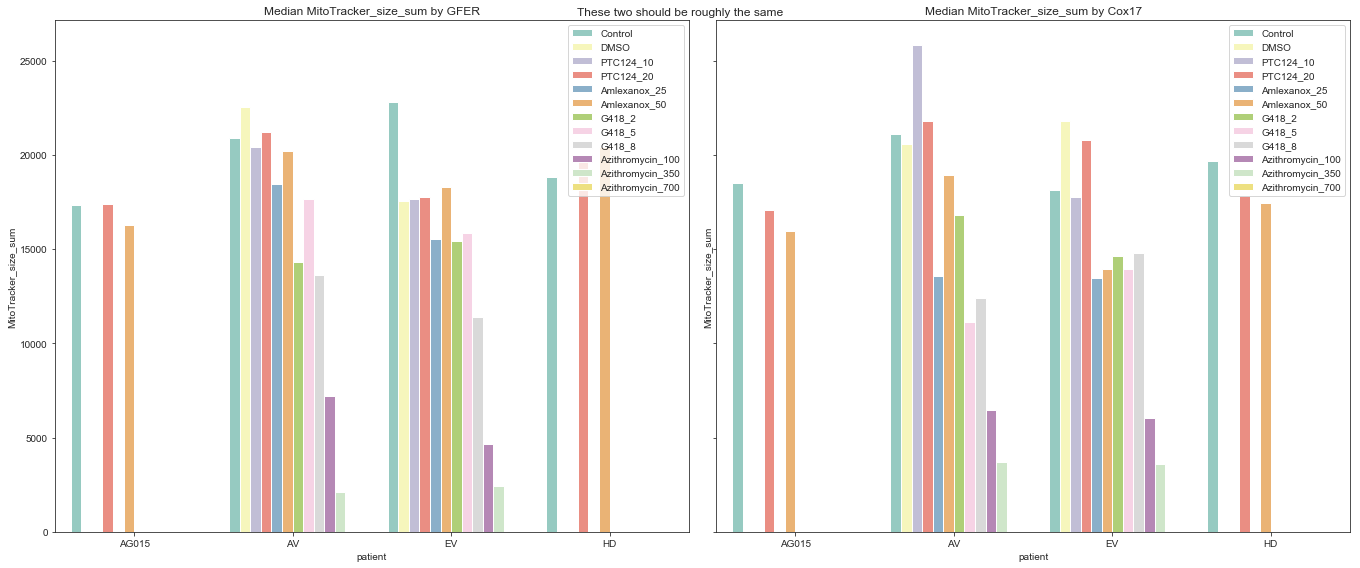

In [36]:
g=df.groupby(['AntiBodyType', 'patient' , 'Compound'], as_index=False)["MitoTracker_size_sum"].median()

sns.set_style('ticks')
fig, ax = plt.subplots(1,2, sharey=True)
fig.set_size_inches(19, 8)
for i, abType in enumerate(df.AntiBodyType.unique()):
    sns.barplot(x="patient", y="MitoTracker_size_sum", hue="Compound", data=g[(g.Compound != 'Azithromycin_700') & (g.AntiBodyType==abType)], palette="Set3" ,ax=ax[i], ci=None, hue_order=order);
    ax[i].set_title("Median MitoTracker_size_sum by "+abType)
    ax[i].legend(loc = 1)
plt.tight_layout()
plt.suptitle("These two should be roughly the same");

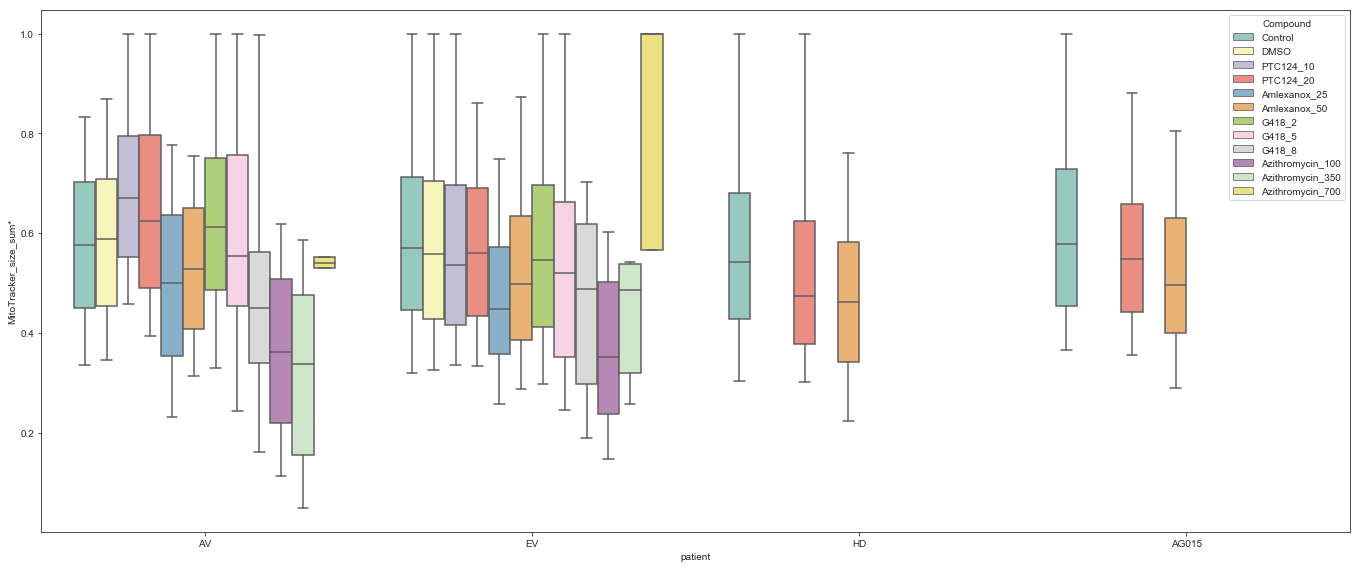

In [37]:
df['MitoTracker_size_sum*'] = df['MitoTracker_size_sum']/df['Cyto_size']

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_size_sum*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
plt.tight_layout()

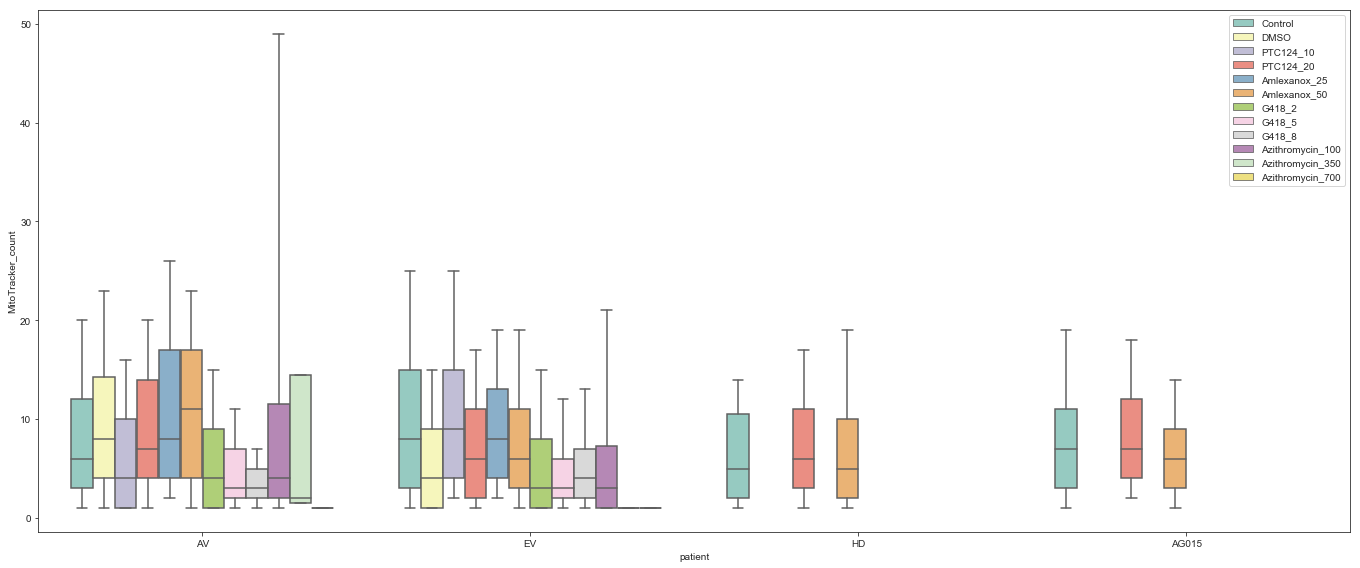

In [38]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)
ax = sns.boxplot(x="patient", y="MitoTracker_count", hue="Compound", data=df[(df.Compound.isin(compounds_use)) & (df.AntiBodyType==abType)], palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.legend(loc=1)
plt.tight_layout()

---
### Alon and Ella react differently to the same treatments in a consistent manner
---

In [39]:
df.columns.tolist()

['Actin_avg',
 'Actin_max',
 'Actin_q10',
 'Actin_q50',
 'Actin_q90',
 'Actin_size',
 'Actin_std',
 'Cyto_area',
 'Cyto_aspect_ratio',
 'Cyto_avg',
 'Cyto_circularity_size_ratio',
 'Cyto_cx',
 'Cyto_cy',
 'Cyto_extent',
 'Cyto_h',
 'Cyto_max',
 'Cyto_min_enclosing_circle_area',
 'Cyto_perimeter',
 'Cyto_q10',
 'Cyto_q50',
 'Cyto_q90',
 'Cyto_rect_area',
 'Cyto_size',
 'Cyto_solidity',
 'Cyto_std',
 'Cyto_w',
 'AntiBody_avg',
 'AntiBody_max',
 'AntiBody_q10',
 'AntiBody_q50',
 'AntiBody_q90',
 'AntiBody_size',
 'AntiBody_std',
 'MitoTracker_area_mean',
 'MitoTracker_area_median',
 'MitoTracker_area_q10',
 'MitoTracker_area_q90',
 'MitoTracker_area_std',
 'MitoTracker_area_sum',
 'MitoTracker_aspect_ratio_mean',
 'MitoTracker_aspect_ratio_median',
 'MitoTracker_aspect_ratio_q10',
 'MitoTracker_aspect_ratio_q90',
 'MitoTracker_aspect_ratio_std',
 'MitoTracker_aspect_ratio_sum',
 'MitoTracker_avg_mean',
 'MitoTracker_avg_median',
 'MitoTracker_avg_q10',
 'MitoTracker_avg_q90',
 'MitoTracke

Next round to image after 12h, child per plate, lower doses (no need to G418, AZ 700)  
X60  
Nir plate + actin over nucli for all